In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

import time
import datetime

import numpy as np
import pandas as pd
import tensorflow as tf

import keras
from keras.models import Sequential, load_model
from keras.layers import *
from keras.layers.wrappers import *
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger, EarlyStopping
# multivariate output multi-step 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import keras.backend.tensorflow_backend as ktf

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('numpy ver.: ' + np.__version__)
print('pandas ver.: ' + pd.__version__)
print('tensorflow ver.: ' + tf.__version__) 
print('keras ver.: ' + keras.__version__)

Using TensorFlow backend.


numpy ver.: 1.18.4
pandas ver.: 0.25.1
tensorflow ver.: 2.1.0
keras ver.: 2.3.1


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# Create 1D-Convolutional model with periodicity in days

In [ ]:

# stocks =['JHSF3','GGBR4','BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']

stocks = pd.read_csv('bovespa.csv')

for stock in stocks[['codigo.sa']].values:
    data = pd.read_csv('data-hour/' + stock[0] + '.csv')

    # define input sequence
    dataset = data[['low', 'open','close', 'high']].ffill().values
    
    

    # choose a number of time steps
    n_steps_in, n_steps_out = 35, 7
    # convert into input/output
    X, y = split_sequences(dataset, n_steps_in, n_steps_out)
    # flatten output
    n_output = y.shape[1] * y.shape[2]
    y = y.reshape((y.shape[0], n_output))
    # the dataset knows the number of features, e.g. 2
    n_features = X.shape[2]
    # define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_output))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=100, verbose=0)
    model.save('models-hour/' + stock[0] + '-CNN.h5')

KeyboardInterrupt: 

In [128]:
# Create 1D-Convolutional model with periodicity in hours

In [127]:

# stocks =['JHSF3','GGBR4','BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']

stocks = pd.read_csv('bovespa.csv')

for stock in stocks[['codigo.sa']].values:
    data = pd.read_csv('data-hour/' + stock[0] + '.csv')

    # define input sequence
    dataset = data[['low', 'open','close', 'high']].ffill().values
    
    

    # choose a number of time steps
    n_steps_in, n_steps_out = 35, 7
    # convert into input/output
    X, y = split_sequences(dataset, n_steps_in, n_steps_out)
    # flatten output
    n_output = y.shape[1] * y.shape[2]
    y = y.reshape((y.shape[0], n_output))
    # the dataset knows the number of features, e.g. 2
    n_features = X.shape[2]
    # define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_output))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=100, verbose=0)
    model.save('models-hour/' + stock[0] + '-CNN.h5')

KeyboardInterrupt: 

### Plot with hour predictions - 7 timesteps

/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

ValueError: Error when checking input: expected conv1d_99_input to have shape (40, 4) but got array with shape (35, 4)

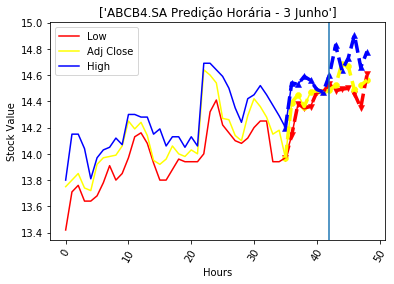

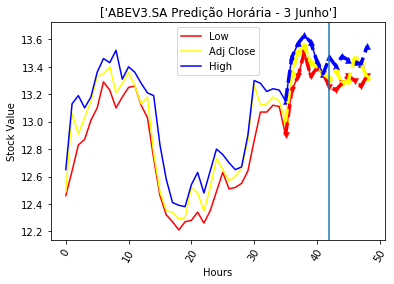

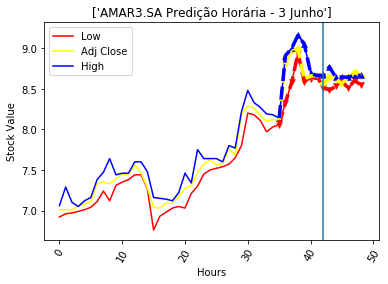

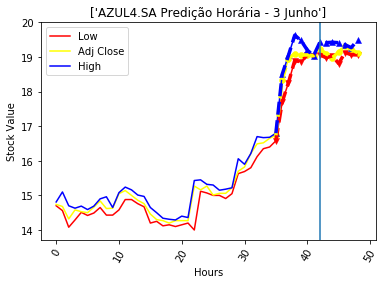

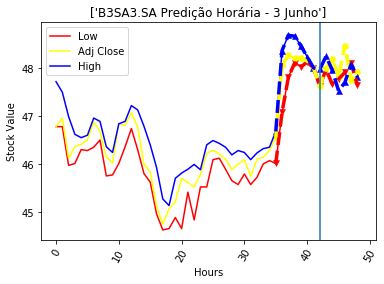

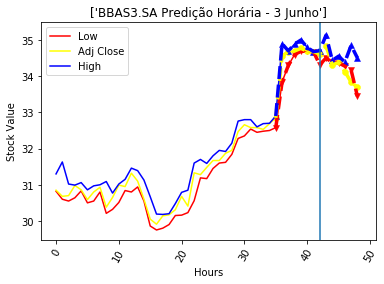

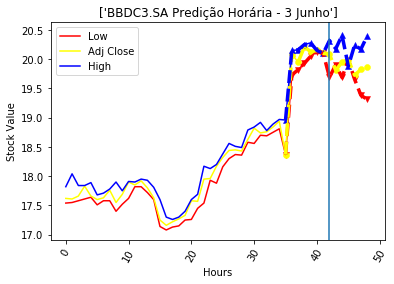

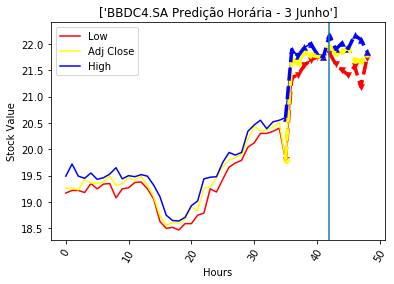

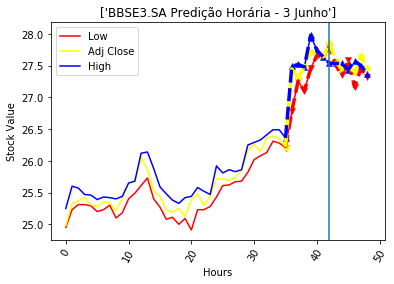

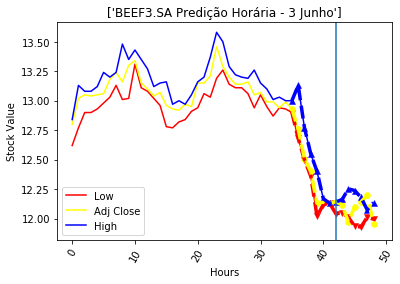

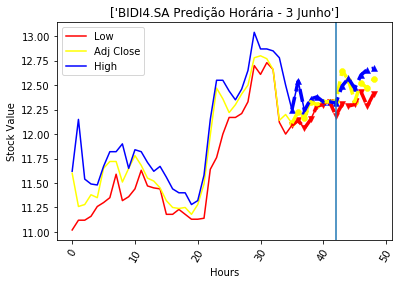

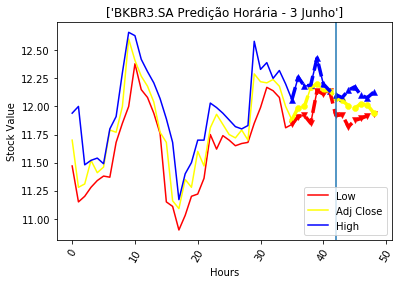

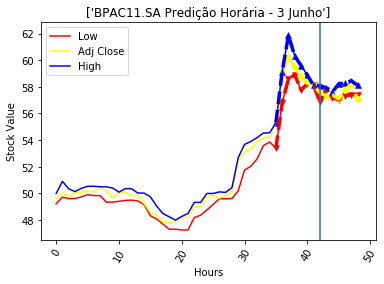

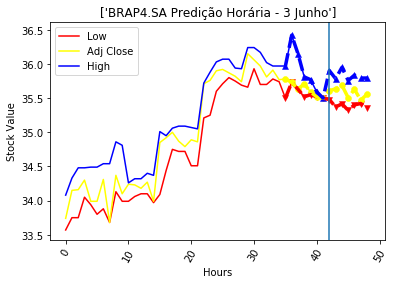

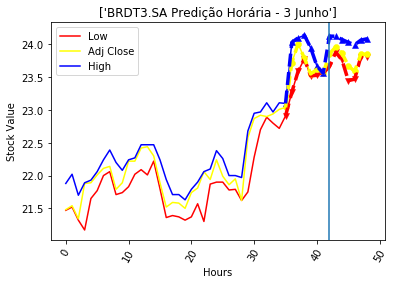

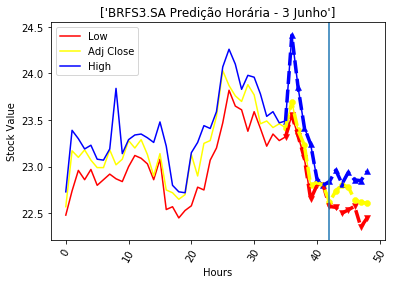

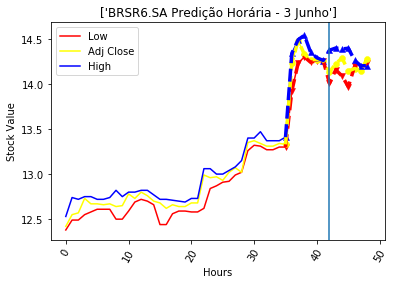

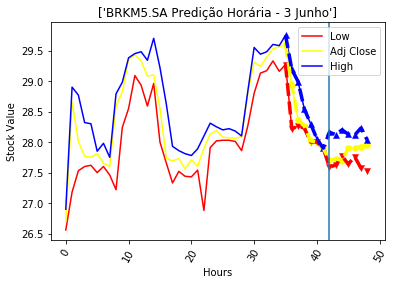

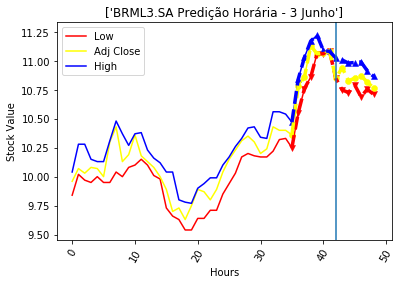

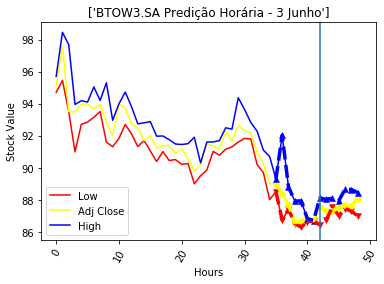

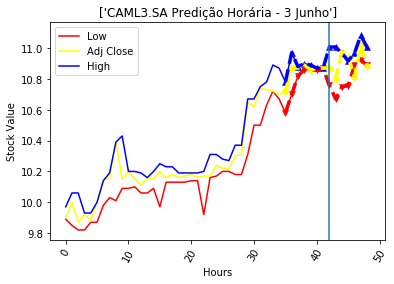

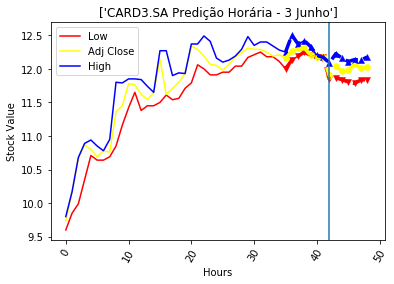

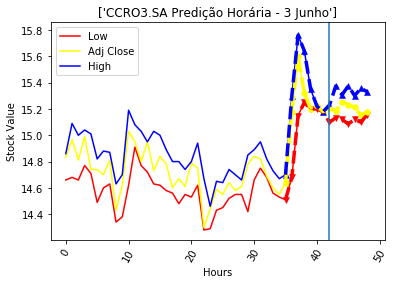

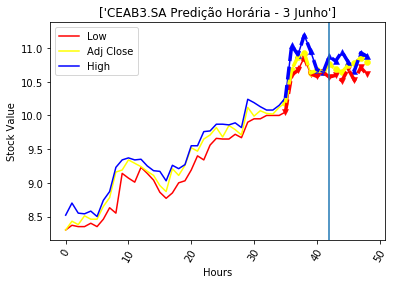

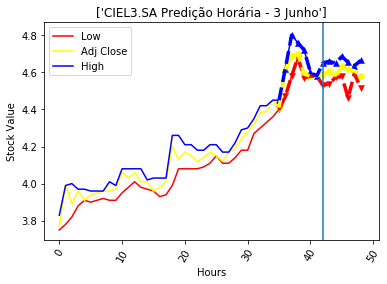

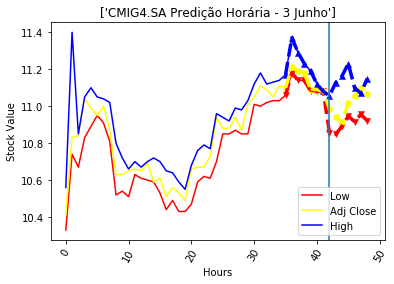

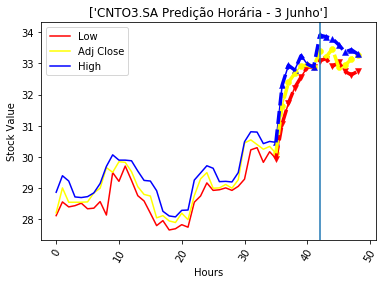

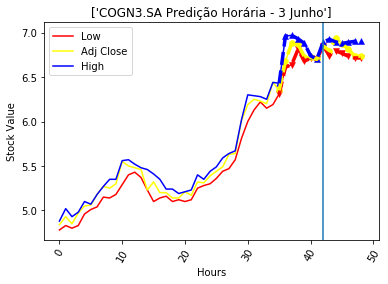

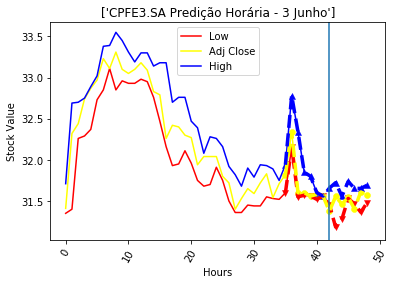

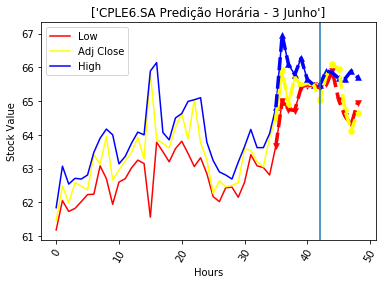

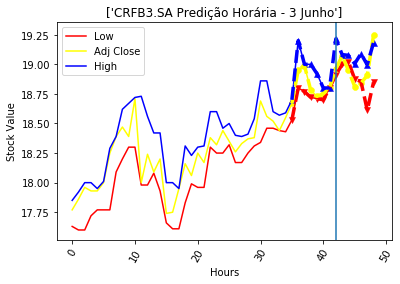

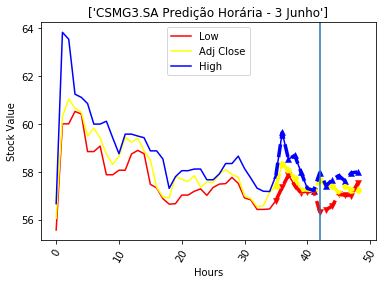

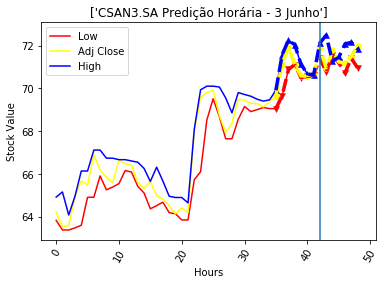

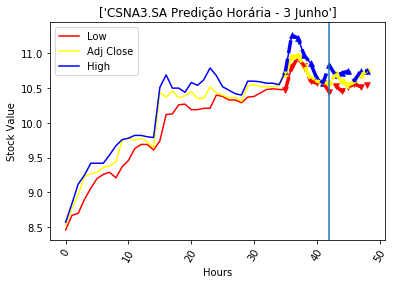

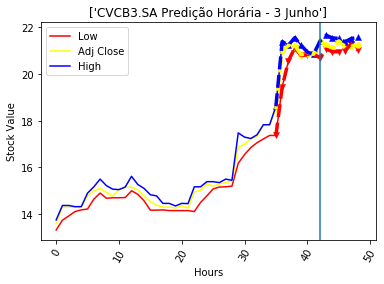

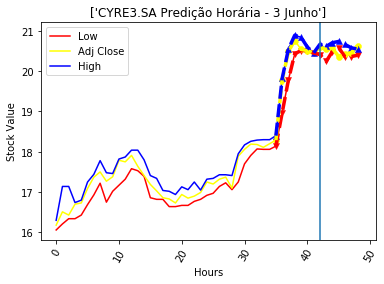

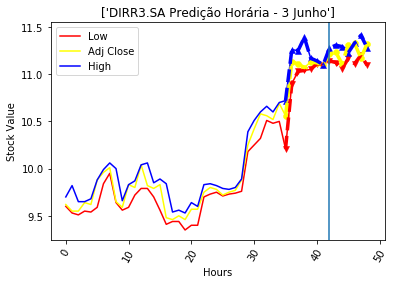

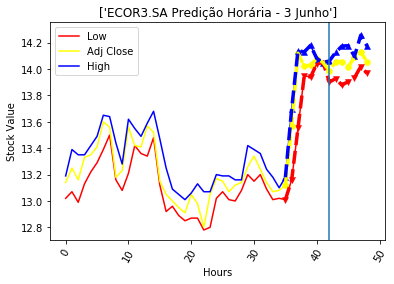

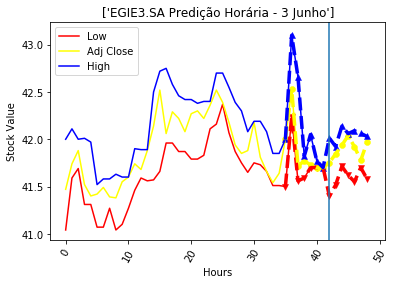

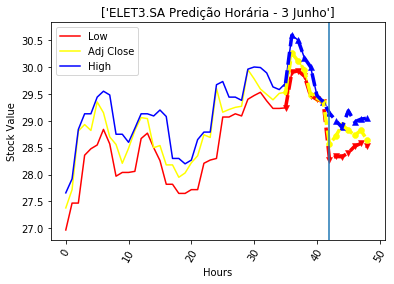

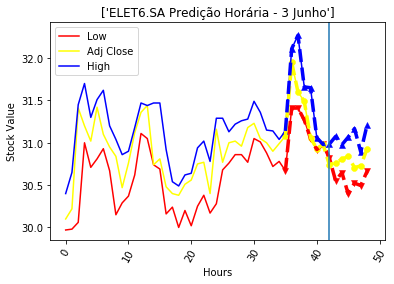

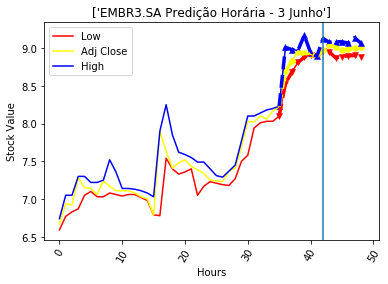

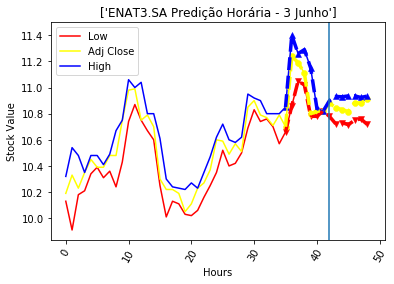

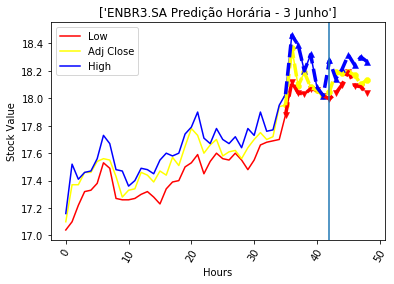

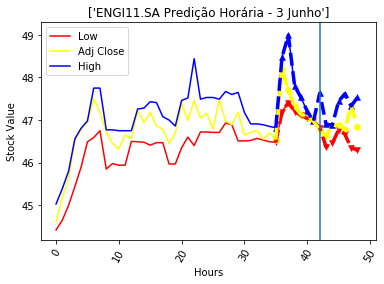

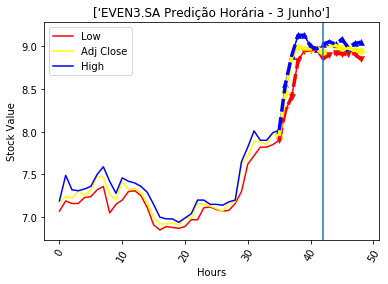

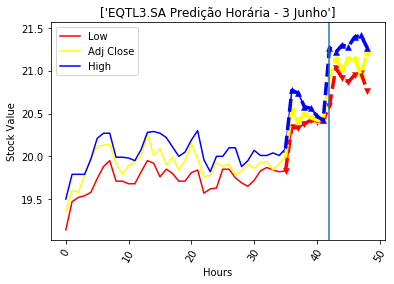

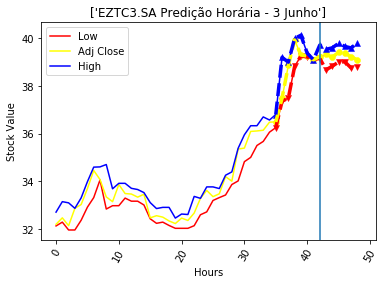

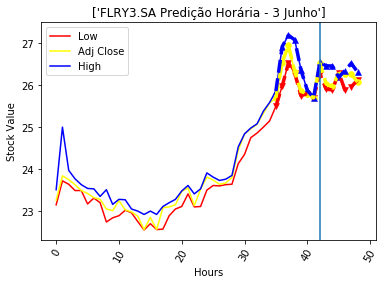

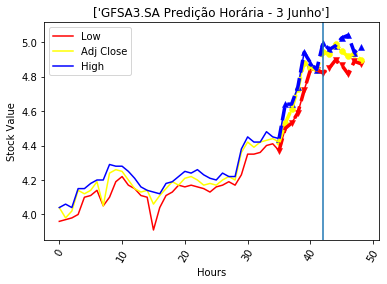

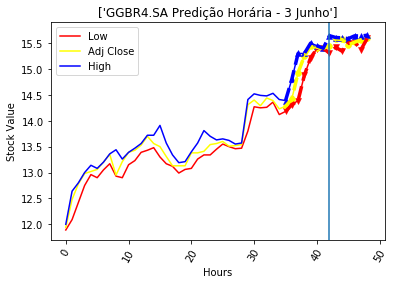

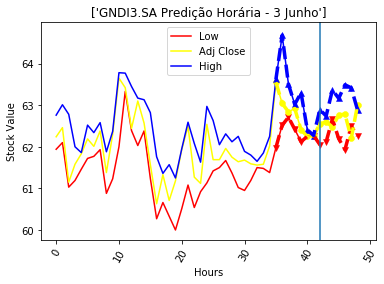

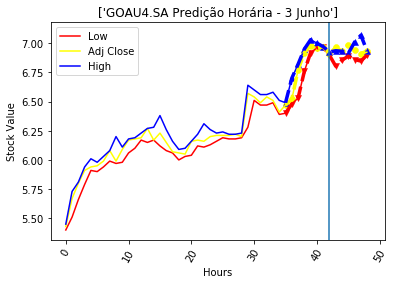

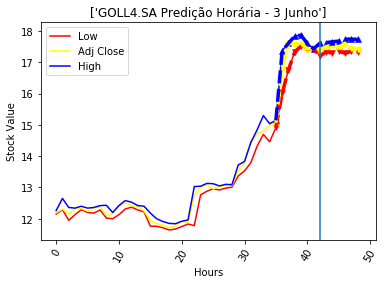

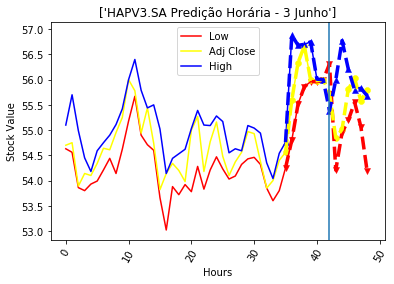

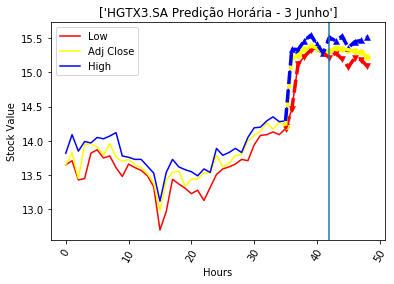

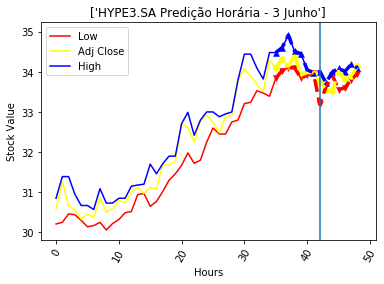

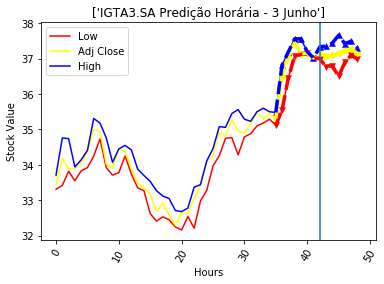

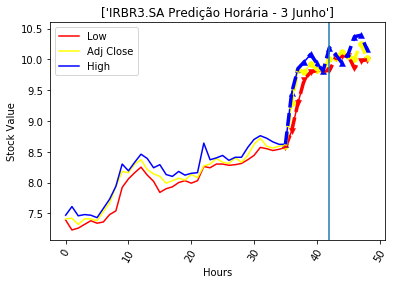

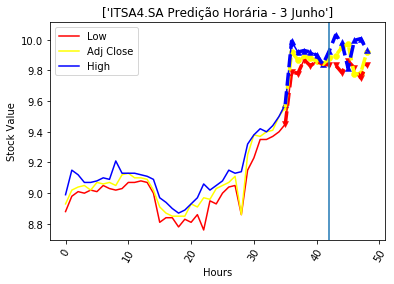

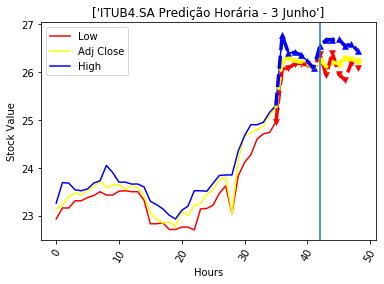

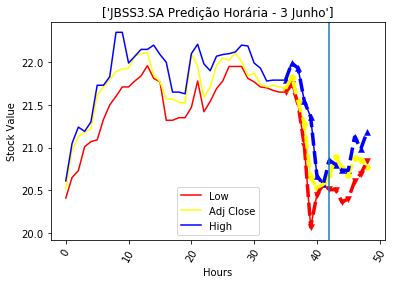

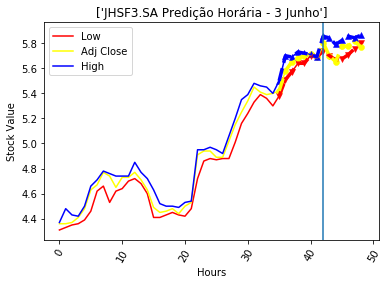

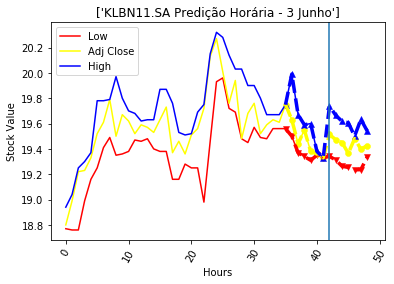

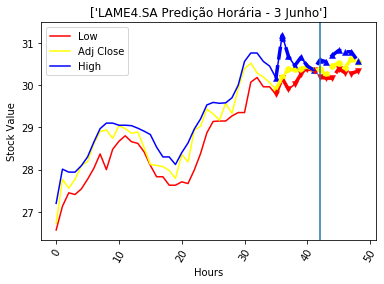

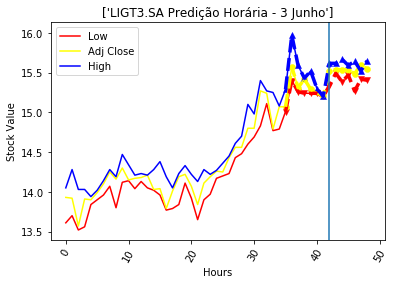

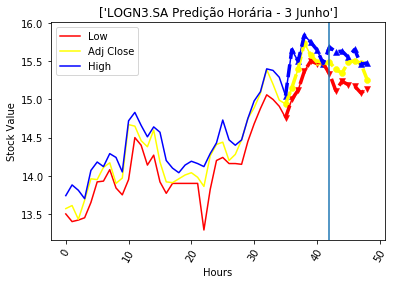

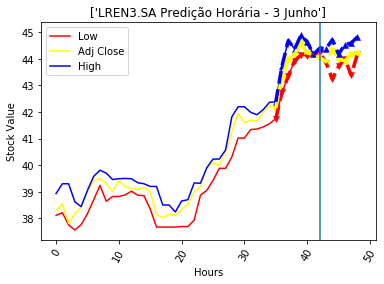

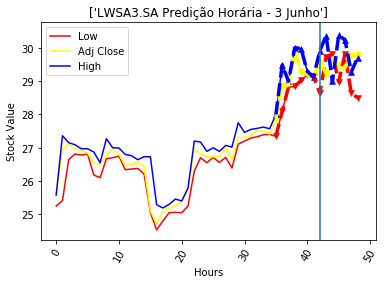

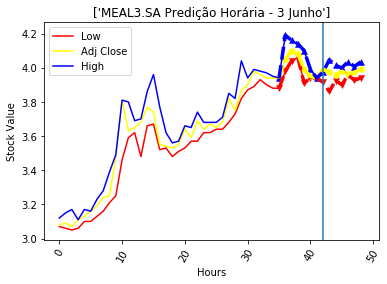

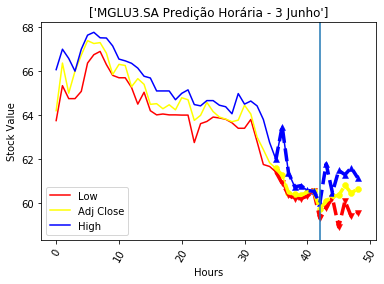

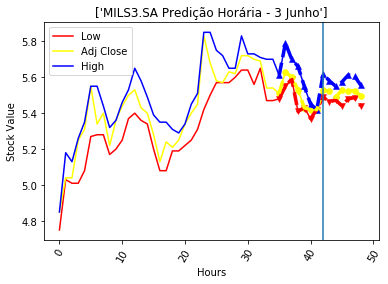

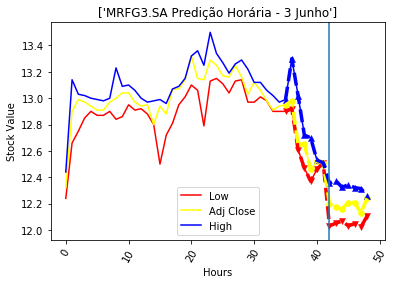

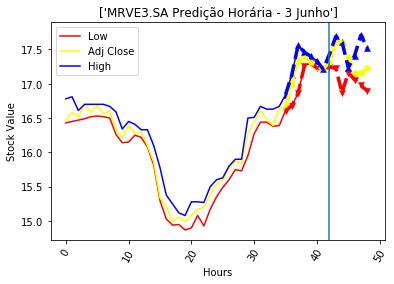

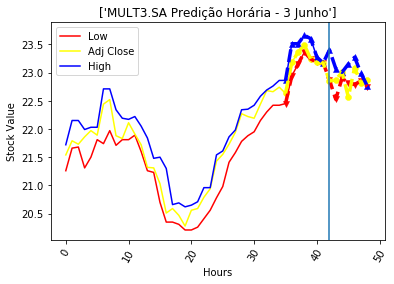

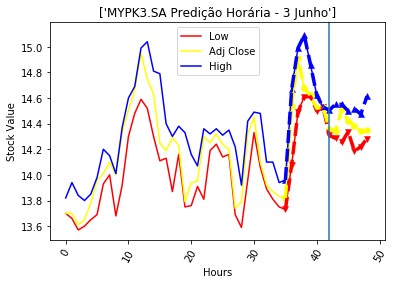

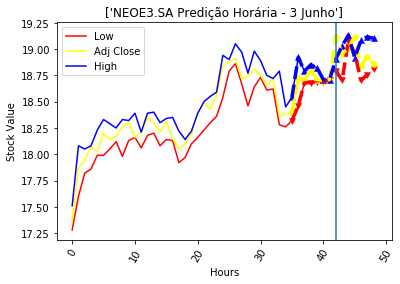

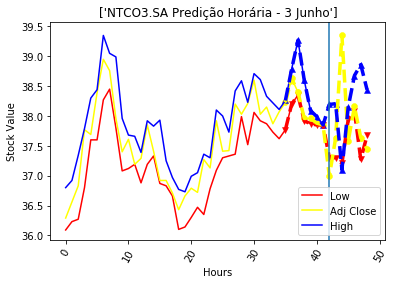

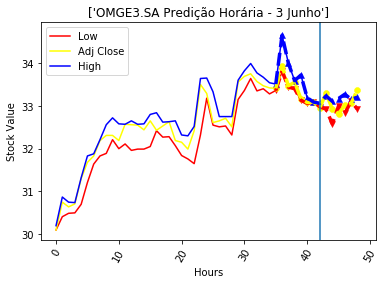

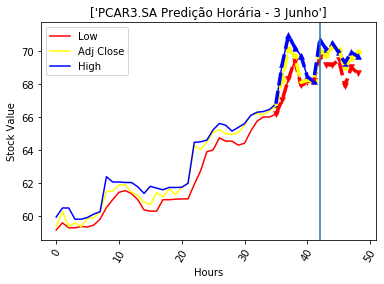

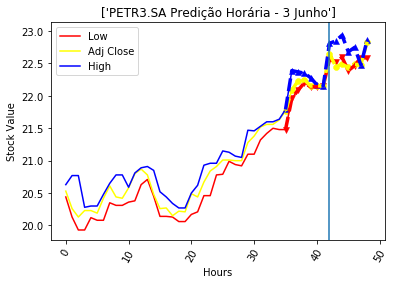

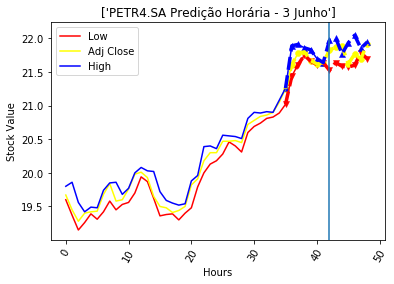

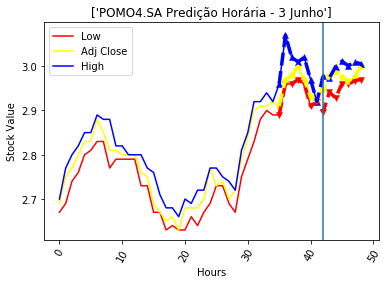

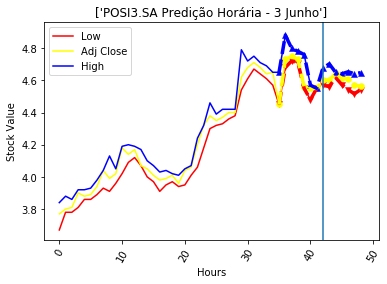

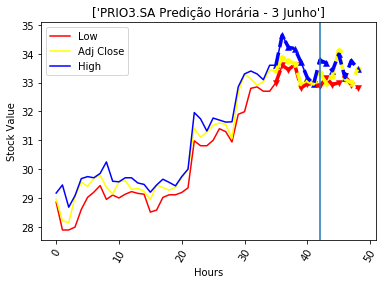

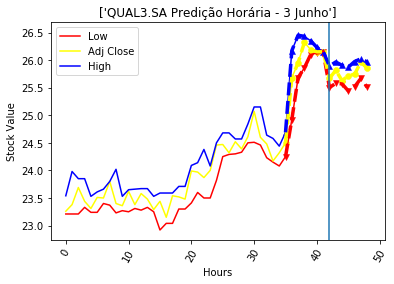

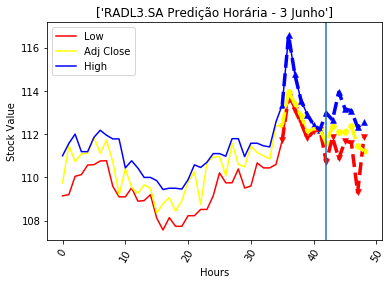

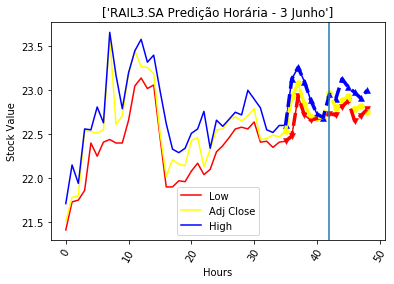

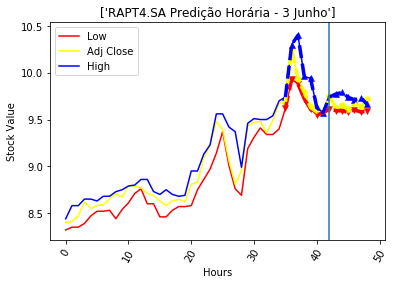

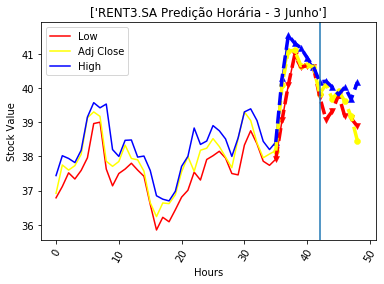

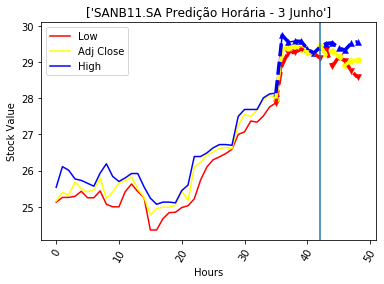

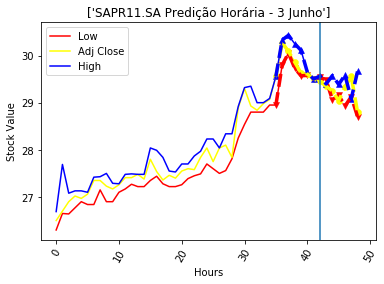

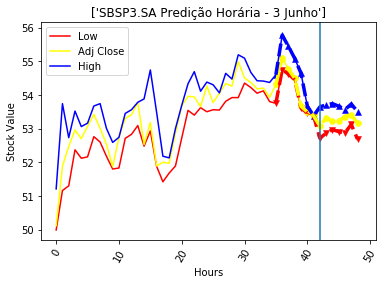

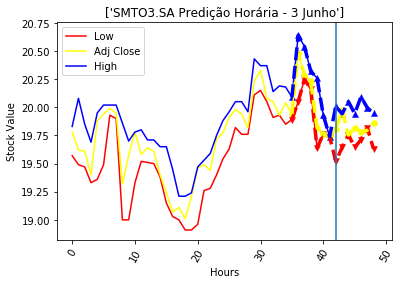

In [122]:
# stocks =['JHSF3','GGBR4','BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']
# stocks =['BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']
%matplotlib inline

stocks = pd.read_csv('bovespa.csv')

for stock in stocks[['codigo.sa']].values:
    
    data = pd.read_csv('data-hour/' + stock[0] + '.csv')

    # define input sequence
    dataset = data[['low', 'open','close', 'high']].ffill().values

    # choose a number of time steps
    n_steps_in, n_steps_out = 35, 7
    # convert into input/output
    X, y = split_sequences(dataset, n_steps_in, n_steps_out)
    # flatten output
    n_output = y.shape[1] * y.shape[2]
    y = y.reshape((y.shape[0], n_output))
    
    
    model = load_model('models-hour/' + stock[0] + '-CNN.h5' )

    yhat = model.predict(X[-1:], verbose=0)

    variables = 4    

#     print(stock[0], mean_absolute_percentage_error(np.reshape(y[-1], (n_steps_out*variables)),
#                                     np.reshape(yhat[-1], (n_steps_out*variables))))

    names = ['low', 'open', 'close', 'high']

    X_test = pd.DataFrame(X[-1])
    X_test.columns = names
    X_test['data'] = 0
#     X_test['data'] = data[['data']][-38:-n_steps_out].values

    y_test = np.reshape(y[-1], (n_steps_out,4))
    y_test = pd.DataFrame(y_test, columns=names)
    y_test['data'] = 0
#     y_test['data'] = data[['data']][-n_steps_out:].values

    yhat = model.predict(X[-1:])
    y_pred = np.reshape(yhat[-1], (n_steps_out,4))
    y_pred = pd.DataFrame(y_test, columns=names)
    y_pred['data'] = 0
#     y_pred['data'] = data[['data']][-n_steps_out:].values
    y_pred

    y_future = model.predict(np.reshape(data[['low', 'open', 'close', 'high']][-n_steps_in:].values, (1, n_steps_in,4)))
    y_future = np.reshape(y_future[-1], (n_steps_out,4))
    y_future = pd.DataFrame(y_future, columns=names)
    y_future['data'] = 0
    

    y_future

    df_true = pd.concat([X_test,y_test])
    plt.figure()
    plt.plot(range(n_steps_in+n_steps_out), df_true[['low']], color='red')
    plt.plot(range(n_steps_in+n_steps_out), df_true[['close']], color='yellow')
    plt.plot(range(n_steps_in+n_steps_out), df_true[['high']], color='blue')
    plt.legend(labels=['Low', 'Adj Close', 'High'])

    df_pred = pd.concat([y_pred,y_future])
    plt.plot(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['low']], linewidth=3.5,linestyle='--', color='red')
    plt.plot(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['close']], linewidth=3.5,linestyle='--', color='yellow')
    plt.plot(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['high']], linewidth=3.5,linestyle='--', color='blue')
    
    plt.scatter(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['low']], linewidth=.5,marker='v', color='red')
    plt.scatter(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['close']], linewidth=.5,marker='o', color='yellow')
    plt.scatter(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['high']], linewidth=.5,marker='^', color='blue')
    
    plt.xticks(rotation=60)
    plt.title(stock + ' Predição Horária - 3 Junho')     
    plt.axvline(n_steps_in+n_steps_out, 0, np.max(df_true[['high']]))
    plt.xlabel('Hours')
    plt.ylabel('Stock Value')   
    
    plt.savefig('images-hour/' + stock[0] + '-03-06.png',figsize=(28,28), dpi=300)


### Plot results with dayly periodicity - 5 timesteps

In [ ]:
stocks =['JHSF3','GGBR4','BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']
# stocks =['BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']

# %matplotlib inline

stocks = pd.read_csv('bovespa.csv')
stocks = stocks['codigo.sa'].values

for stock in stocks:
    
    data = pd.read_csv('data/' + stock + '.csv')

    # define input sequence
    dataset = data[['Low', 'Adj Close', 'High']].ffill().values

    # choose a number of time steps
    n_steps_in, n_steps_out = 15, 5
    # convert into input/output
    X, y = split_sequences(dataset[:-2], n_steps_in, n_steps_out)
    # flatten output
    n_output = y.shape[1] * y.shape[2]
    y = y.reshape((y.shape[0], n_output))
    
    
    model = load_model('models/' + stock + '-CNN.h5' )

    yhat = model.predict(X[-1:], verbose=0)

    variables = 3    

    print(stock, mean_absolute_percentage_error(np.reshape(y[-1], (n_steps_out*variables)),
                                np.reshape(yhat[-1], ( n_steps_out*variables))))

    names = ['Low', 'Adj Close', 'High']

    X_test = pd.DataFrame(X[-1])
    X_test.columns = names
    X_test['data'] = 0
    X_test['data'] = data[['Date']][-(n_steps_in+n_steps_out):-n_steps_out].values

    y_test = np.reshape(y[-1], (n_steps_out,variables))
    y_test = pd.DataFrame(y_test, columns=names)
    y_test['data'] = 0
    y_test['data'] = data[['Date']][-n_steps_out:].values

    yhat = model.predict(X[-1:])
    y_pred = np.reshape(yhat[-1], (n_steps_out,variables))
    y_pred = pd.DataFrame(y_test, columns=names)
    y_pred['data'] = 0
    y_pred['data'] = data[['Date']][-n_steps_out:].values
    y_pred

    y_future = model.predict(np.reshape(data[['Low', 'Adj Close', 'High']][-n_steps_in:].values, (1, n_steps_in,variables)))
    y_future = np.reshape(y_future[-1], (n_steps_out,variables))
    y_future = pd.DataFrame(y_future, columns=names)
    y_future['data'] = 0
#     y_future['data'] = [    '2020-06-02 07:00:00',
#                             '2020-06-02 08:00:00',
#                             '2020-06-02 09:00:00',
#                             '2020-06-02 10:00:00',
#                             '2020-06-02 11:00:00',
#                             '2020-06-02 12:00:00',
#                             '2020-06-02 13:00:00',
#                             '2020-06-02 14:00:00'
#                             ]

    y_future

    df_true = pd.concat([X_test,y_test])
    plt.figure()
    plt.plot(range(n_steps_in+n_steps_out), df_true[['Low']], linewidth=3.5,linestyle='--', color='red')
    plt.plot(range(n_steps_in+n_steps_out), df_true[['Adj Close']], linewidth=3.5,linestyle='--', color='yellow')
    plt.plot(range(n_steps_in+n_steps_out), df_true[['High']], linewidth=3.5,linestyle='--', color='blue')
    plt.legend(labels=['Low', 'Adj Close', 'High'])

    df_pred = pd.concat([y_pred,y_future])
    plt.plot(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['Low']], color='red')
    plt.plot(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['Adj Close']], color='yellow')
    plt.plot(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['High']], color='blue')
    
    
    plt.scatter(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['Low']], marker='v',color='red')
    plt.scatter(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['Adj Close']], color='yellow')
    plt.scatter(range(n_steps_in, n_steps_in+2*n_steps_out), df_pred[['High']], marker='^', color='blue')
    
    plt.xticks(rotation=90)
    plt.title(stock + ' Predição Diaria - 3 Junho')     
    plt.axvline(n_steps_in+n_steps_out, 0, np.max(df_true[['High']]))
    plt.xlabel('Days')
    plt.ylabel('Stock Value')   
#     plt.show()
    
    plt.savefig('images/' + stock + '-03-06.png',figsize=(28,28), dpi=300)


ABCB4.SA 1.2184248368063126
ABEV3.SA 3.306682629660354
AMAR3.SA 16.39943661545567
AZUL4.SA 16.090914289895537
B3SA3.SA 8.96622432436589
BBAS3.SA 2.2577569667857227
BBDC3.SA 6.0465597159326645
BBDC4.SA 4.473255953657506
BBSE3.SA 2.8057742653130195
BEEF3.SA 6.213254563950983
BIDI4.SA 6.18023227965057
BKBR3.SA 9.109007442431357
BPAC11.SA 6.776026120983965
BRAP4.SA 4.556572704248437
BRDT3.SA 2.2366478845834905
BRFS3.SA 5.540810476116439
BRSR6.SA 2.197726860866905
BRKM5.SA 46.51122286917273
BRML3.SA 6.652989504283171
BTOW3.SA 12.105182603297218
CAML3.SA 4.683288483880746


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CARD3.SA 4.109829656422863


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CCRO3.SA 5.5662879125429585


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CEAB3.SA 2.609043178844428


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CIEL3.SA 10.302181360626312


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CMIG4.SA 167.63979295737647


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CNTO3.SA 9.000204990637638


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


COGN3.SA 11.977660696305438


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CPFE3.SA 2.985927384707664


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CPLE6.SA 2.7258564211731193


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CRFB3.SA 3.0614687766231494


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CSMG3.SA 6.011411533583369


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CSAN3.SA 3.2754433740786313


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CSNA3.SA 8.499804163686967


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CVCB3.SA 3.3162339737867197


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CYRE3.SA 6.403222363306922


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


DIRR3.SA 5.430683325454423


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ECOR3.SA 1.3525619664687598


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


EGIE3.SA 1.0890068916786986


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ELET3.SA 1.9053632936791707


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ELET6.SA 2.8028037894618576


/home/marcos/tf/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [ ]:
stocks = pd.read_csv('bovespa.csv')
stocks = stocks['codigo.sa'].values

# stocks =['JHSF3','GGBR4','BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']
# stocks =['BRSR6', 'ABCB4','BPAC11','PETR4','PRIO3', 'VIVT4','MILS3','CPLE6']


variables = 3
time_steps = 5


for stock in stocks:
    data = pd.read_csv('data/' + stock + '.SA.csv')

    # define input sequence
    dataset = data[['Low', 'Adj Close', 'High']].ffill().values

    # choose a number of time steps
    n_steps_in, n_steps_out = 35, 5
    # convert into input/output
    X, y = split_sequences(dataset, n_steps_in, n_steps_out)
    
    
    model = load_model('models/' + stock + '-CNN.h5')

    names = ['low', 'close', 'high']

    X_test = pd.DataFrame(X[-1])
    X_test.columns = names
    X_test['Date'] = 0
    X_test['Date'] = data[['Date']][-20:-5].values

    y_test = np.reshape(y[-1], (5,3))
    y_test = pd.DataFrame(y_test, columns=names)
    y_test['Date'] = 0
    y_test['Date'] = data[['Date']][-5:].values

    yhat = model.predict(X[-1:])
    y_pred = np.reshape(yhat[-1], (5,3))
    y_pred = pd.DataFrame(y_test, columns=names)
    y_pred['Date'] = 0
    y_pred['Date'] = data[['Date']][-5:].values
    y_pred

    y_future = model.predict(np.reshape(data[['Low', 'Adj Close', 'High']][-15:].values, (1, 15,3)))
    y_future = np.reshape(y_future[-1], (5,3))
    y_future = pd.DataFrame(y_future, columns=names)
    y_future['Date'] = 0
    
    y_future_labels = [datetime.date(2012,2,7)]

    for i in range(4):
        y_future_labels.append(y_future_labels[i] + datetime.timedelta(days= 7-d.weekday() if d.weekday()>3 else 1))

    y_future['Date'] = ['2020-06-01','2020-06-02','2020-06-03','2020-06-04','2020-06-05']
    y_future

    df_true = pd.concat([X_test,y_test])
    plt.figure()
    plt.plot(df_true['Date'], df_true[['Low']], linewidth=3.5,linestyle='--', color='red')
    plt.plot(df_true['Date'], df_true[['Adj Close']], linewidth=3.5,linestyle='--', color='yellow')
    plt.plot(df_true['Date'], df_true[['High']], linewidth=3.5,linestyle='--', color='blue')
    plt.legend(labels=['Low', 'Adj Close', 'High'])

    df_pred = pd.concat([y_pred,y_future])
    plt.plot(df_pred['Date'], df_pred[['Low','Adj Close', 'High']], color='green')
    plt.xticks(rotation=60)
    plt.title(stock + ' Predição 1 Junho') 
#     plt.show()
    plt.savefig('images/' + stock + 'N-01-06.png',figsize=(28,28), dpi=300)
